# Creation of RV method animation

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.gridspec as gridspec
from IPython import display
import os
from tamar.tools.settings import PlotDir
import starry

In [25]:
# shape functions

def circle(radius):
    angle = np.linspace(0, 2 * np.pi , 360)
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    return x, y

def anim_circle(radius, phi):
    return np.array([radius*np.cos(phi), radius*np.sin(phi)])

def anim_circle_planet(radius, phi):
    return np.array([radius*np.cos(phi-np.pi), radius*np.sin(phi-np.pi)])

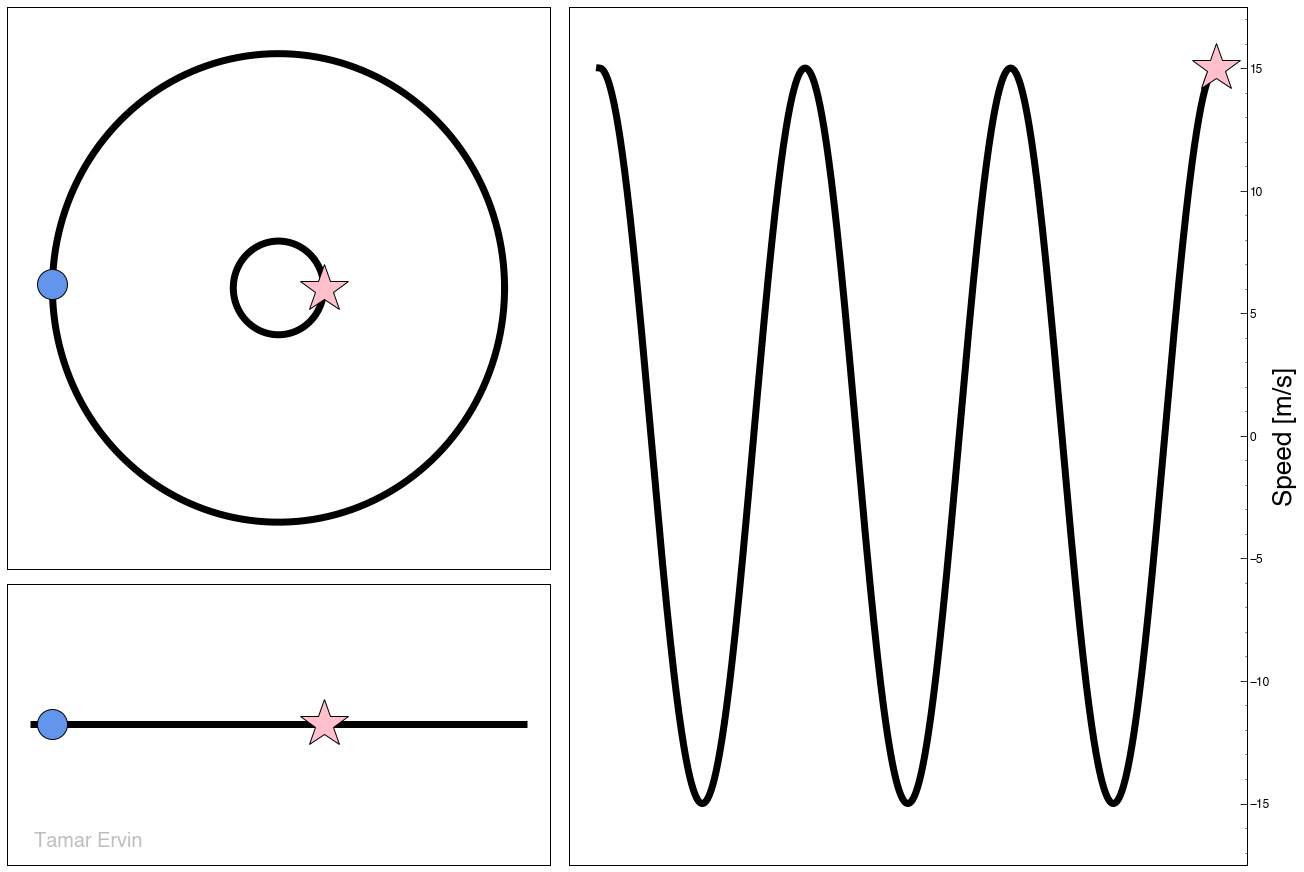

In [184]:
plot_style = os.path.join(PlotDir.MPL, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.style.use(plot_style)

# setup figure
fig = plt.figure(constrained_layout=True, figsize=(18, 12))
widths = [8, 10]
heights = [8, 4]
gs = fig.add_gridspec(2, 2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[0:, 1:])

# setup shapes
# top down
x_star, y_star = circle(1)
x_plan, y_plan = circle(5)
ax1.plot(x_star, y_star, color='k', linewidth=7, zorder=1)
ax1.plot(x_plan, y_plan, color='k', linewidth=7, zorder=2)
ax1.set(xticks=[], yticks=[])
ax1.set(xlim=(-6, 6), ylim=(-6, 6))

# line of sight
ax2.hlines(0.5, -5.5, 5.5, color='k', linewidth=7, zorder=1)
ax2.set(xlim=(-6, 6), ylim=(0, 1))
ax2.set(xticks=[], yticks=[])

# sine wave
x_sin = np.arange(np.pi/2, 13*np.pi/2, .0001)
y_sin = np.sin(x_sin) * 15
ax3.plot(x_sin, y_sin, color='k', linewidth=7)
ax3.set(xticks=[])
ax3.set(ylim=(-17.5, 17.5), yticks=np.arange(-15, 15.2, 5))
ax3.set_ylabel('Speed [m/s]', fontsize=26)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()


X = np.linspace(np.pi/2, 13*np.pi/2, 1080)
Y = np.sin(X)*15

star, = ax1.plot([], [], marker='*', markersize=50, color='pink', markeredgecolor='k', linewidth=0.5)
planet, = ax1.plot([], [], marker='o', markersize=30, color='cornflowerblue', markeredgecolor='k', linewidth=0.5)
star2, = ax2.plot([], [], marker='*', markersize=50, color='pink', markeredgecolor='k', linewidth=0.5, zorder=2)
planet2, = ax2.plot([], [], marker='o', markersize=30, color='cornflowerblue', markeredgecolor='k', linewidth=0.5, zorder=3)
dot, = ax3.plot([], [], marker='*', markersize=50, color='pink', markeredgecolor='k', linewidth=0.5)


ax2.text(0.05, 0.05, 'Tamar Ervin', transform=ax2.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='left', va='bottom')

def animate(i):
    # top down - star
    xstar, ystar = anim_circle(1, i*np.pi/180)
    star.set_data([xstar], [ystar])

    # top down - planet
    xplanet, yplanet = anim_circle_planet(5, i*np.pi/180)
    planet.set_data([xplanet], [yplanet])

    # line of sight - star
    star2.set_data([xstar], 0.5)

    # line of sight - planet
    planet2.set_data([xplanet], 0.5)

    # sine wave
    dot.set_data(X[i], Y[i])

    if yplanet > 0:
        planet2.set_zorder(2)
        star2.set_zorder(3)
        return star, planet, planet2, star2, dot,
    else:
        planet2.set_zorder(3)
        star2.set_zorder(2)
        return star, planet, star2, planet2, dot,

anim = animation.FuncAnimation(fig, animate, init_func=None, frames=1080, interval=20, repeat=True, blit=True)

writervideo = animation.FFMpegWriter(fps=30)
anim.save('rv_animation.gif', writer=writervideo)
plt.show()


Make RM animation.

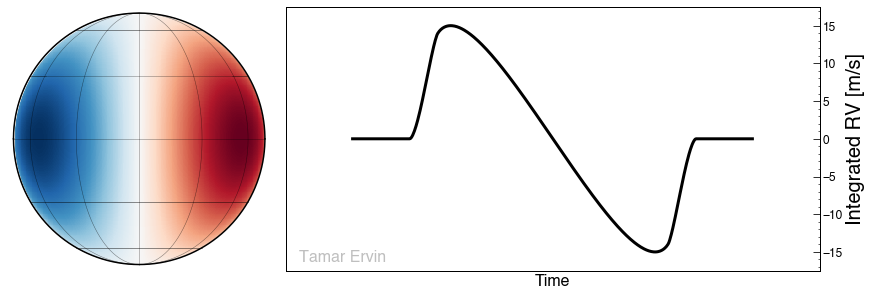

In [185]:
plot_style = os.path.join(PlotDir.MPL, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.style.use(plot_style)

fig = plt.figure(constrained_layout=True, figsize=(12, 4))
widths = [4, 8]
heights = [4]
gs = fig.add_gridspec(1, 2, width_ratios=widths, height_ratios=heights)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# plot the star
ax1.set(xticks=[], yticks=[])
ax1.set(xlim=(-1, 1), ylim=(-1, 1))
marker_style = dict(color='tab:blue', linestyle=':', marker='o',
                    markersize=200, markerfacecoloralt='tab:red')

starry.config.lazy = False
starry.config.quiet = True
map = starry.Map(udeg=2, rv=True)
map.inc = 90
map.obl = 0
map.veq = 1.0e4
map.alpha = 0.3
yo = -0.25
ro = 0.1
map[1] = 0.5
map[2] = 0.25
map.show(ax=ax1)

# plot the RM curve
ax2.set(xlim=(-2,2))
ax2.set(xticks=[])
ax2.set(ylim=(-17.5, 17.5), yticks=np.arange(-15, 15.2, 5))
ax2.set_ylabel('Integrated RV [m/s]', fontsize=20)
ax2.set_xlabel('Time', fontsize=16)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.spines["top"].set_visible(True)
ax2.spines["bottom"].set_visible(True)
ax2.spines["right"].set_visible(True)
ax2.spines["left"].set_visible(True)

# animations
planet, = ax1.plot([], [], marker='o', markersize=30, color='black', markeredgecolor='lavender', linewidth=0.5, zorder=2)
xplanet = np.linspace(-1.2, 1.2, 500)

xdot = np.linspace(-1.5, 1.5, 500)
ydot = map.rv(xo=xdot, yo=yo, ro=ro)
ydot = ydot/np.nanmax(ydot) * 15
line, = ax2.plot(xdot, ydot, color='k', linewidth=3, zorder=1)
dot, = ax2.plot([], [], marker='o', markersize=8, markeredgecolor='k', linewidth=0.5, zorder=2)

ax2.text(0.025, 0.025, 'Tamar Ervin', transform=ax2.transAxes,
        fontsize=16, color='gray', alpha=0.5,
        ha='left', va='bottom')

# animate the planet moving across star
def animate(i):
    # planet
    planet.set_data(xplanet[i], 0)
    planet.set_zorder(2)

    # rm curve
    line.set_data(xdot[:i], ydot[:i])
    # line.axes.axis(ax2)
    line.set_zorder(1)

    # curve dot
    # dot.set_data(xdot[i], ydot[i])
    # dot.set_zorder(2)
    #
    # # change color of dot over time
    # cmap=plt.get_cmap('RdBu')
    # int = map.intensity(lat=ydot[i], lon=xdot[i])[0]
    # if ydot[i] == 0:
    #     dot.set_color(color='white')
    # else:
    #     dot.set_color(cmap(int))
    # if ydot[i] > 0:
    #     dot.set_color(color='blue')
    # elif ydot[i] < 0:
    #     dot.set_color(color='red')
    # else:
    #     dot.set_color(color='white')

    return planet, line, dot

anim = animation.FuncAnimation(fig, animate, init_func=None, frames=500, interval=20, repeat=True, blit=True)

writervideo = animation.FFMpegWriter(fps=30)
anim.save('rm_animation.gif', writer=writervideo)
plt.show()

Defunct.

In [ ]:
def skewed_sin(a):
    skew = np.sin(a)*np.sin(np.pi/6)
    return skew

In [ ]:
plot_style = os.path.join(PlotDir.MPL, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.style.use(plot_style)

fig = plt.figure(constrained_layout=True, figsize=(12, 4))
widths = [4, 8]
heights = [4]
gs = fig.add_gridspec(1, 2, width_ratios=widths, height_ratios=heights)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# plot the star
ax1.set(xticks=[], yticks=[])
ax1.set(xlim=(-1, 1), ylim=(-1, 1))
marker_style = dict(color='tab:blue', linestyle=':', marker='o',
                    markersize=200, markerfacecoloralt='tab:red')
# ax1.plot(0, 0, **marker_style, fillstyle='left', zorder=1)
starry.config.lazy = False
starry.config.quiet = True
map = starry.Map(udeg=2, rv=True)
map.inc = 90
map.obl = 0
map.veq = 1.0e4
map.alpha = 0.3
map.show(ax=ax1)

# plot the sine curve
ax2.set(xlim=(-2,2))
ax2.set(xticks=[])
ax2.set(ylim=(-17.5, 17.5), yticks=np.arange(-15, 15.2, 5))
ax2.set_ylabel('Speed [m/s]', fontsize=16)
ax2.set_xlabel('Time', fontsize=16)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

map = starry.Map(udeg=2, rv=True)
map.inc = 60
map.obl = 30
map.veq = 1.0e4
map.alpha = 0.3
xo = np.linspace(-1.5, 1.5, 5000)
yo = -0.25
ro = 0.1
map[1] = 0.5
map[2] = 0.25
y = map.rv(xo=xo, yo=yo, ro=ro)
ax2.plot(xo, y/np.nanmax(y) * 15, color='k', linewidth=5)

# animations
planet, = ax1.plot([], [], marker='o', markersize=30, color='lavender', markeredgecolor='k', linewidth=0.5, zorder=2)
xplanet = np.linspace(-1.2, 1.2, 360)

# animate the planet moving across star
def animate(i):
    # planet
    planet.set_data(xplanet[i], 0)
    planet.set_zorder(2)
    return planet,

anim = animation.FuncAnimation(fig, animate, init_func=None, frames=360, interval=20, repeat=True, blit=True)

writervideo = animation.FFMpegWriter(fps=30)
anim.save('rm_animation.gif', writer=writervideo)
plt.show()

In [ ]:
map = starry.Map(udeg=2, rv=True)
map.inc = 90
map.obl = 0
map.veq = 1.0e4
map.alpha = 0.3
map.show()


Watermark these animations yay!!

In [162]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [164]:
image_list = ['rm_animation.gif', 'rv_animation.gif']

def copyright_apply(input_image_path, output_image_path, text):
    photo = Image.open(input_image_path)

    #Store image width and height
    w, h = photo.size

    # make the image editable
    drawing = ImageDraw.Draw(photo)
    font = ImageFont.truetype("Roboto-Black.ttf", 68)

    #get text width and height
    text = text
    text_w, text_h = drawing.textsize(text, font)

    pos = w - text_w, (h - text_h) - 50

    c_text = Image.new('RGB', (text_w, text_h), color ='#000000')
    drawing = ImageDraw.Draw(c_text)

    drawing.text((0,0), text, fill="#ffffff", font=font)
    c_text.putalpha(100)

    photo.paste(c_text, pos, c_text)
    photo.save(output_image_path)

for input in image_list:
    output = 'marked_' + input
    copyright_apply(input, output, 'Tamar Ervin')

In [167]:
text = 'Tamar Ervin (2021)'
input_image_path = 'rv_animation.gif'
output_image_path = 'marked_rv_animation.gif'

photo = Image.open(input_image_path)

#Store image width and height
w, h = photo.size

# make the image editable
drawing = ImageDraw.Draw(photo)
font = ImageFont.truetype("Roboto-Black.ttf", 68)

#get text width and height
text = text
text_w, text_h = drawing.textsize(text, font)

pos = w - text_w, (h - text_h) - 50

c_text = Image.new('RGB', (text_w, text_h), color ='#000000')
drawing = ImageDraw.Draw(c_text)

drawing.text((0,0), text, fill="#ffffff", font=font)
c_text.putalpha(100)

photo.paste(c_text, pos, c_text)
photo.save(output_image_path)